# Big Mart Sales Prediction (Regression Problem )

In [4]:
#  Import the requires Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [5]:

#  Data Collection and the Processing Part.
dataset = pd.read_csv("salesdata.csv")
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#  Number of the row and the columns into the dataset.
dataset.shape
# we have the 12 features and 8523 rows.

(8523, 12)

In [7]:
# About the all datatypes of the dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Categorical Features
--> Item_Identifier    
--> Outlet_Size                
--> Outlet_Location_Type       
--> Outlet_Type                
--> Outlet_Identifier          
--> Item_Type                  
--> Item_Fat_Content            

In [8]:
# Check the Missing value or the NaN Value into the data.
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Handle the missing numerical Value
Mean --> Average Value               
Mode --> Most Repeated Value

Method 1 is to fill the mean to the Numerical Feature.

In [9]:
# dataset["Item_Weight"].fillna(dataset["Item_Weight"].mean(), inplace=True)

dataset.fillna({"Item_Weight": dataset["Item_Weight"].mean()}, inplace=True)

In [10]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replace the Categorical data into the respective feature.

In [11]:
#  Method 1 is to fill the mode to the Categorical Feature.
dataset["Outlet_Size"].fillna(dataset["Outlet_Size"].mode()[0], inplace=True)

# Method-2
# dataset.fillna({"Outlet_Size": dataset["Outlet_Size"].mode()[0]}, inplace=True)
# dataset["Outlet_Size"].mode()

C:\Users\USER\AppData\Local\Temp\ipykernel_1820\1513331071.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Outlet_Size"].fillna(dataset["Outlet_Size"].mode()[0], inplace=True)


In [12]:
# dataset["Outlet_Size"].isnull().sum( )

In [13]:
# Method-3  (Fill the mode respected to otherfeature and depend on distinct Values for same feature)
# mode_outlet_size = dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
# mode_outlet_size

In [14]:
missing_value = dataset["Outlet_Size"].isnull()
print(missing_value)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [15]:
#  Replace the missing value with the help of the pivot table and lambda Function.
dataset.loc[missing_value, 'Outlet_Size'] = dataset.loc[missing_value, 'Outlet_Type'].apply(lambda x:mode_outlet_size)

In [16]:
dataset.isnull().sum()
#  we dont have the any kind of the missing data.

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data Analysis and Visualization.

In [17]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features.

In [18]:
sns.set()

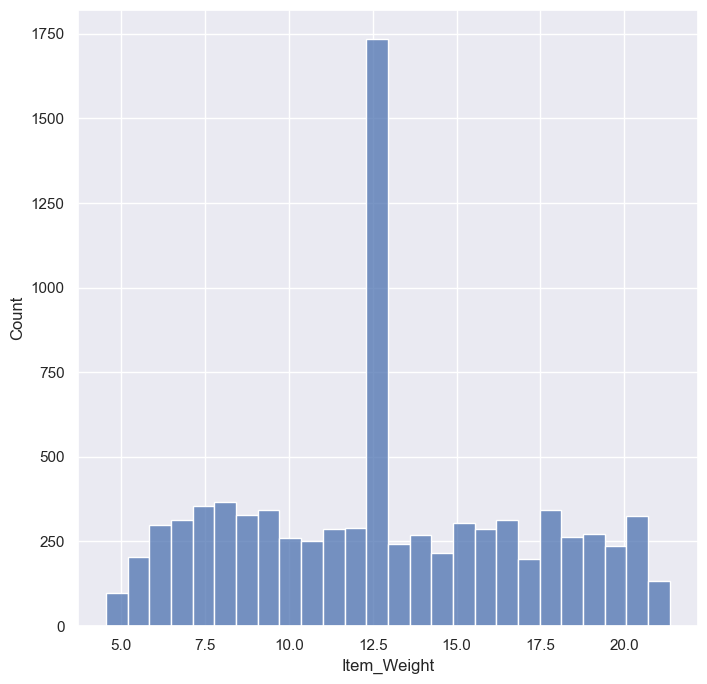

In [19]:
#  Item weight Distribution.
plt.figure(figsize=(8,8))
sns.histplot(dataset["Item_Weight"])
plt.show()

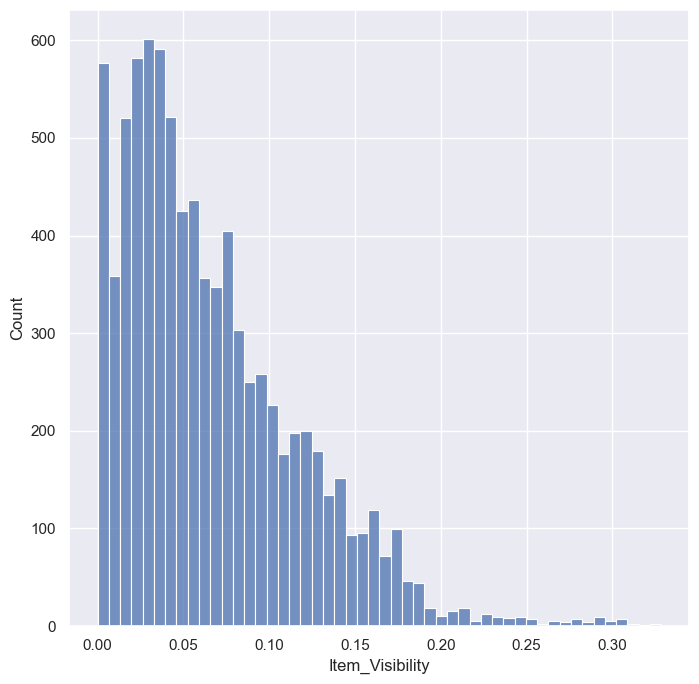

In [20]:
#  Item_Visibility Distribution.
plt.figure(figsize=(8,8))
sns.histplot(dataset["Item_Visibility"])
plt.show()

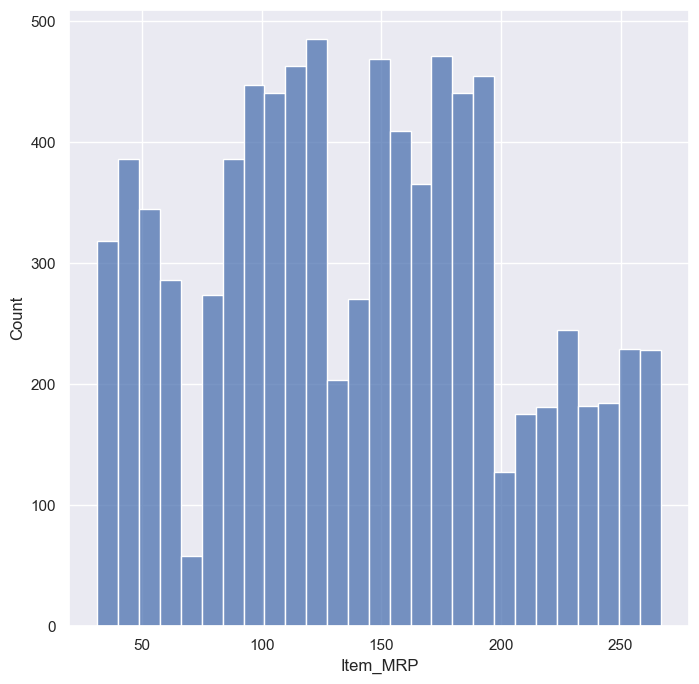

In [21]:
#  ItemMRP Distribution.
plt.figure(figsize=(8,8))
sns.histplot(dataset["Item_MRP"])
plt.show()

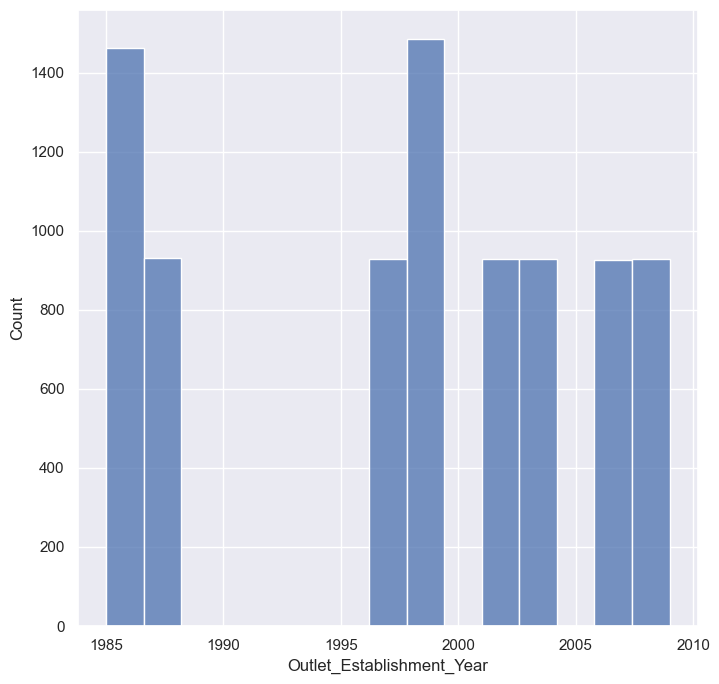

In [22]:
#  Outlet_Establishment_Year Distribution.
plt.figure(figsize=(8,8))
sns.histplot(dataset["Outlet_Establishment_Year"])
plt.show()

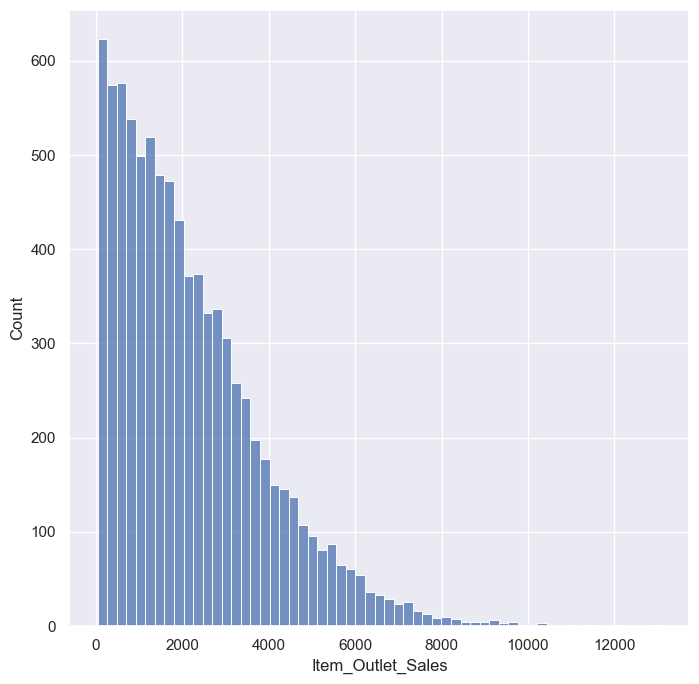

In [23]:
#  Item_Outlet_Sales Distribution.
plt.figure(figsize=(8,8))
sns.histplot(dataset["Item_Outlet_Sales"])
plt.show()

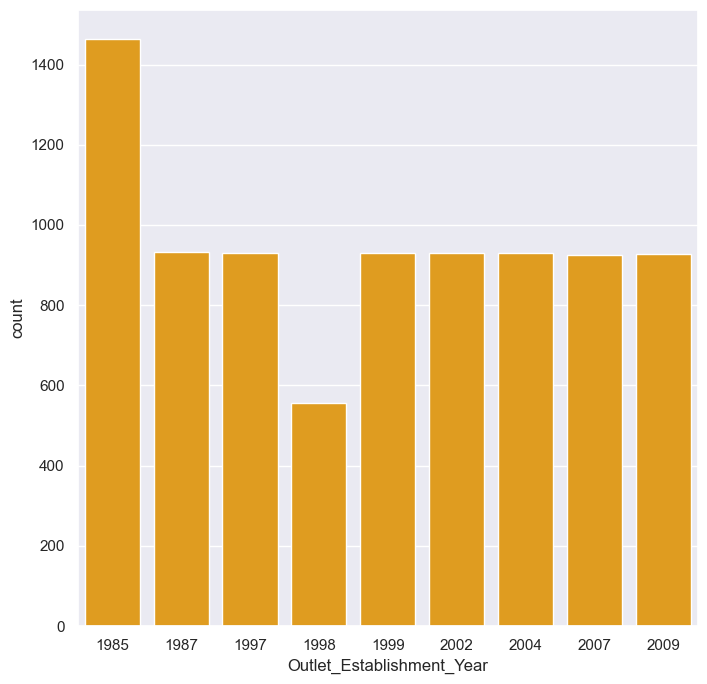

In [24]:
# Outlet_Establishment_Year column
plt.figure(figsize=(8,8))
sns.countplot(x = "Outlet_Establishment_Year", data = dataset, color="orange")
plt.show()

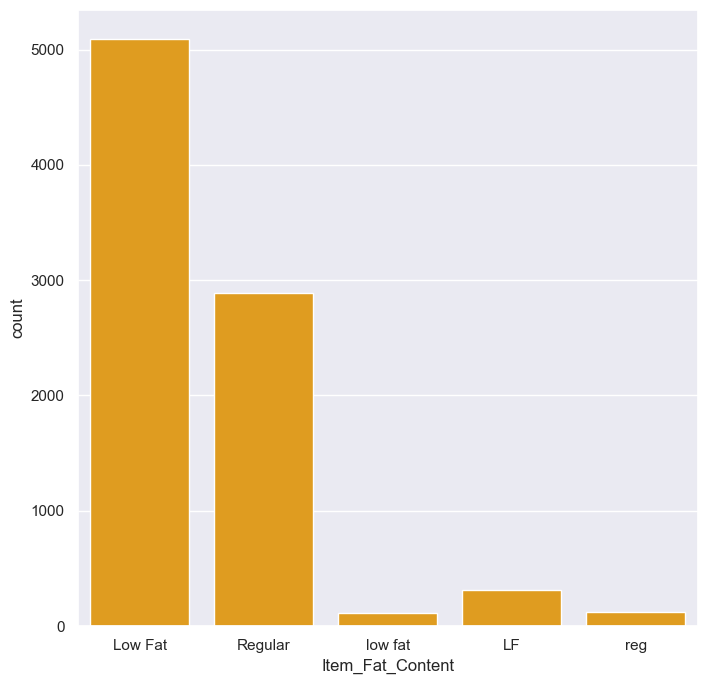

In [25]:
# Item_Fat_Content_column
plt.figure(figsize=(8,8))
sns.countplot(x = "Item_Fat_Content", data = dataset, color="orange")
plt.show()

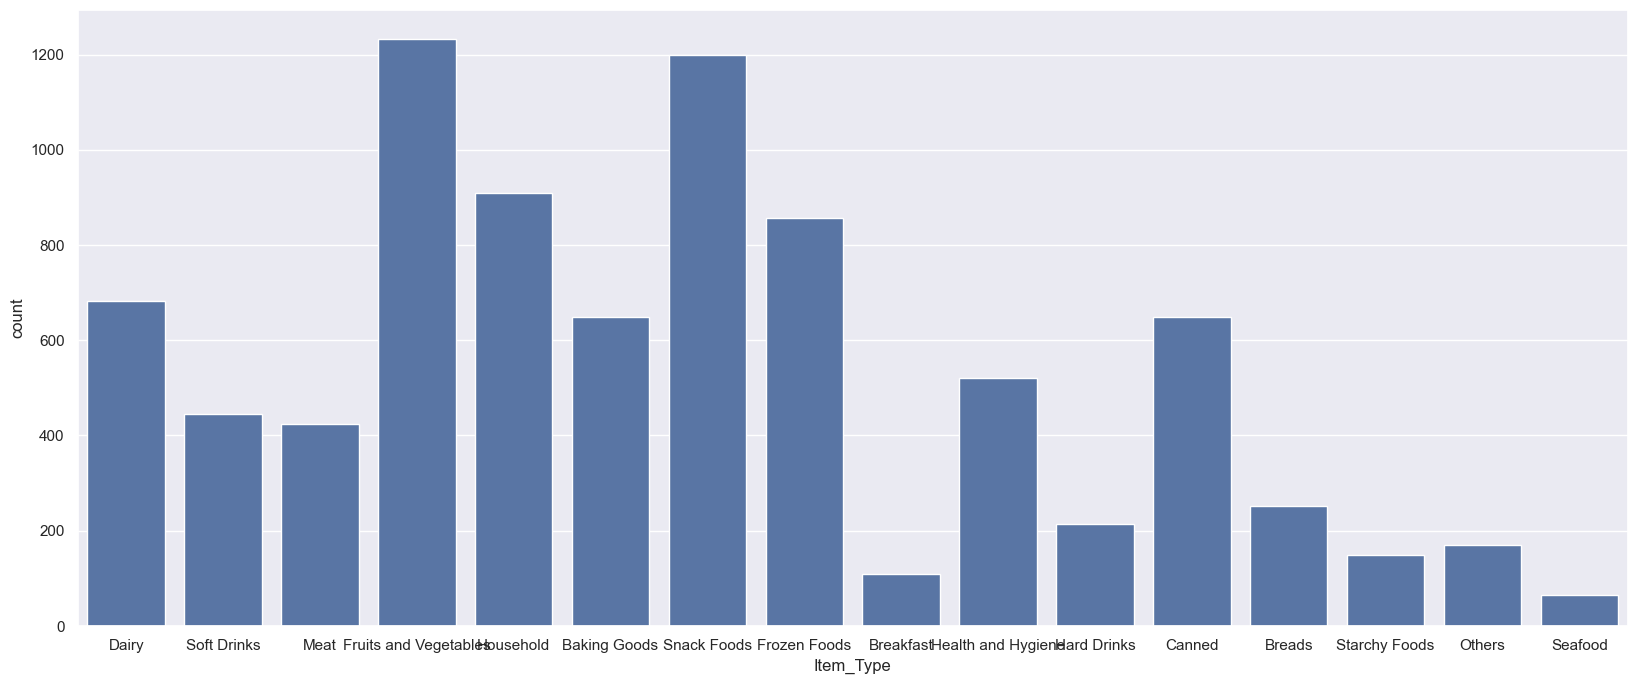

In [26]:
# Item_Fat_Content_column
plt.figure(figsize=(20, 8))
sns.countplot(x = "Item_Type", data = dataset)
plt.show()

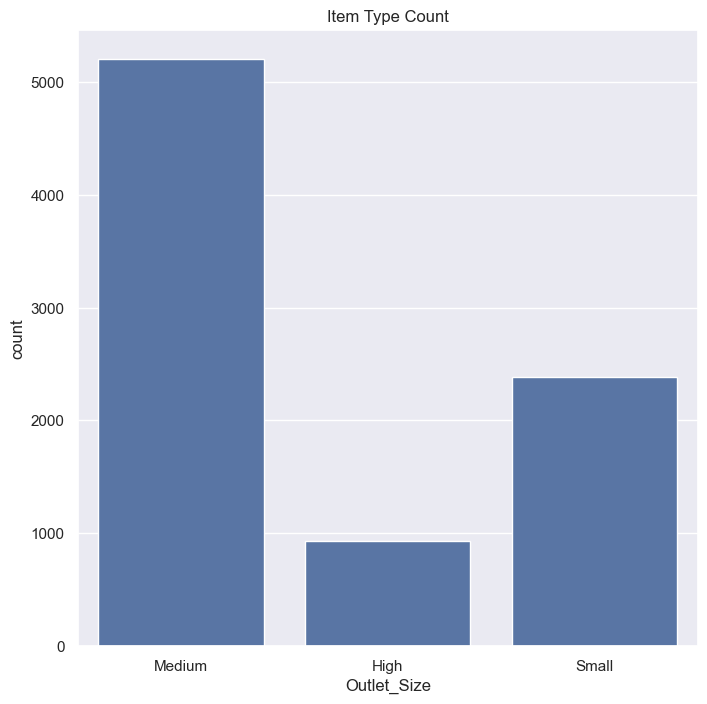

In [27]:
# Item_Fat_Content_column
plt.figure(figsize=(8,8))
sns.countplot(x = "Outlet_Size", data = dataset)
plt.title("Item Type Count")
plt.show()

## Data Preprocessing (Label Encoding)

In [28]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [29]:
dataset["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [30]:
dataset.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

In [31]:
dataset["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

## Label Encoding

In [32]:
encoder = LabelEncoder()

In [33]:
dataset["Item_Identifier"] = encoder.fit_transform(dataset["Item_Identifier"])

dataset["Item_Fat_Content"] = encoder.fit_transform(dataset["Item_Fat_Content"])

dataset["Item_Type"] = encoder.fit_transform(dataset["Item_Type"])

dataset["Outlet_Identifier"] = encoder.fit_transform(dataset["Outlet_Identifier"])

dataset["Outlet_Size"] = encoder.fit_transform(dataset["Outlet_Size"])

dataset["Outlet_Location_Type"] = encoder.fit_transform(dataset["Outlet_Location_Type"])

dataset["Outlet_Type"] = encoder.fit_transform(dataset["Outlet_Type"])

In [34]:
dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


## Splitting the data into the dependent and the independent variable.


In [35]:
x = dataset.drop(columns=["Item_Outlet_Sales"], axis=1)
y = dataset["Item_Outlet_Sales"]

In [36]:
## Splitting the data into the training and testing.
# x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [37]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [44]:
x.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Implementation of Linear Regression

In [132]:
model = LinearRegression()
# model = XGBRegressor()
# model = DecisionTreeRegressor()
# model = RandomForestRegressor()
# model = SVR()
# model = GradientBoostingRegressor()
# model = KNeighborsRegressor()

In [133]:
model.fit(x_train, y_train)

KNeighborsRegressor()

## Evaluation of the model

In [139]:
# R Squared Value.
mse_pred = model.predict(x_train)
mse_accu = metrics.mean_squared_error(mse_pred, y_train)
print("The MSE Squared Value:- ", mse_accu * 100)

# training_data_pred = model.predict(x_train)
# train_data_accu = metrics.mean_absolute_error(training_data_pred, y_train)
print("The RMSE  Value:- ", np.sqrt(mse_accu))

mae_pred = model.predict(x_train)
mae_accu = metrics.mean_absolute_error(mae_pred, y_train)
print("The MAE Squared Value:- ", mae_accu * 100)

r2_pred = model.predict(x_train)
r2_accu = metrics.r2_score(r2_pred, y_train)
print("The R2 Squared Value:- ", r2_accu * 100)

The MSE Squared Value:-  154290894.41716015
The RMSE  Value:-  1242.1388586513192
The MAE Squared Value:-  90892.92231387504
The R2 Squared Value:-  -23.407151443643425


In [140]:
# Values for the Testing data.
mse_pred = model.predict(x_test)
mse_accu = metrics.mean_squared_error(mse_pred, y_test)
print("The MSE Squared Value:- ", mse_accu * 100)

# training_data_pred = model.predict(x_train)
# train_data_accu = metrics.mean_absolute_error(training_data_pred, y_train)
print("The RMSE  Value:- ", np.sqrt(mse_accu))

mae_pred = model.predict(x_test)
mae_accu = metrics.mean_absolute_error(mae_pred, y_test)
print("The MAE Squared Value:- ", mae_accu * 100)

r2_pred = model.predict(x_test)
r2_accu = metrics.r2_score(r2_pred, y_test)
print("The R2 Squared Value:- ", r2_accu * 100)

The MSE Squared Value:-  247714839.07476947
The RMSE  Value:-  1573.8959275465754
The MAE Squared Value:-  114900.65563167154
The R2 Squared Value:-  -101.56111766328397
